<a href="https://colab.research.google.com/github/Brun0oO/Colab/blob/main/Expose_a_local_server_with_JPRQ_(a_free_and_open_source_Ngrok_alternative).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to expose a local server with JPRQ (a free and open-source Ngrok alternative)

First some prerequisites...

In [ ]:
!pip install jprq qrcode fastapi nest-asyncio uvicorn

Create the tunnel using JPRQ...   
We define our public url using an Universal Unique IDentifier.

In [ ]:
import subprocess
import uuid

# configure the tunnel
subdomain = uuid.uuid4().hex
port = 8000
cmd = "python3 -m jprq %s -s=%s" % (port, subdomain)
public_url = "https://%s.jprq.live/" % subdomain

# start the tunnel in a background process
tunnel_subprocess = subprocess.Popen(cmd, shell=True)
print("tunnel subprocess pid : ", tunnel_subprocess.pid)

tunnel subprocess pid :  859


Some verifications... As you can see, there is 2 subprocesses launched from one call to Popen (surely a peculiarity of launching from the notebook here, this does not happen in a standard environment i.e. outside the notebook)

In [ ]:
!ps aux | grep [j]prq

root         859  0.0  0.0  34304  4856 ?        S    08:15   0:00 /bin/sh -c python3 -m jprq 8000 -s=935fa268765a48e3946eccda4047c09f
root         860  5.0  0.2 127324 33136 ?        Sl   08:15   0:00 python3 -m jprq 8000 -s=935fa268765a48e3946eccda4047c09f


Now, we can start and expose a local server to the public url using the jprq tunnel...  
You can access it using the link on your desktop or on your smartphone using the qrcode ;o)

Online at https://935fa268765a48e3946eccda4047c09f.jprq.live/


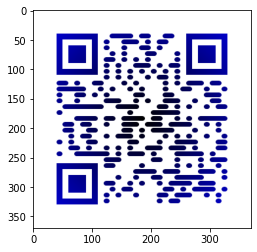

INFO:     Started server process [62]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     82.64.30.44:0 - "GET / HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [62]


In [ ]:
from fastapi import FastAPI
import nest_asyncio
import uvicorn

import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import HorizontalBarsDrawer
from qrcode.image.styles.colormasks import RadialGradiantColorMask

import matplotlib.pyplot as plt
from time import sleep


# create a (very !) simple web app using FastAPI
app = FastAPI()
@app.get("/")
async def root():
    return {"message": "Hello World"}

# serve the web app
#   display the url
print("Online at %s" % public_url)
qrcode = createQRCode(public_url)
plt.imshow(qrcode)
plt.show()
sleep(0.5)
#   launch the http server
nest_asyncio.apply() #need this patch otherwise got "RuntimeError: This event loop is already running"
uvicorn.run(app, port=port)


If you stop the previous cell execution using the square button,  
you can see, all jprq subprocesses have been stopped !

In [ ]:
!ps -aux | grep [j]prq